# Lab 2
Le domaine spatiale

In [2]:
from statistics import correlation

import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage import color
from scipy import signal
import random

## Exercice 1
Créer un filtre 5x5 linéaire avec les distances Tchebychev à partir du centre.

<img src="distance tchebychev.PNG"
     alt="Error can't fetch img"
     style="float: left" />
     
> Défi: À l'aide de numpy,  
> faite le en moins de 4 lignes

> Indices:  
> \- `np.full()`  
> \- `np.ones()`  
> \- `np.zeros()`  
> \- les *slices*

[[2 2 2 2 2]
 [2 1 1 1 2]
 [2 1 0 1 2]
 [2 1 1 1 2]
 [2 2 2 2 2]]


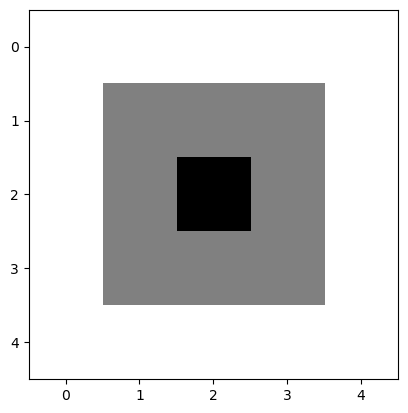

In [3]:
tchebychev = np.full((5,5), 2)
tchebychev[1:4,1:4] = 1
tchebychev[2,2] = 0
print(tchebychev)

plt.imshow(tchebychev, cmap='gray')
plt.show()

## Exercice 2
Créer un histogramme des intensités dans le filtre au premier exercice.
> Utiliser `ndarray.flatten()` et `plt.hist()`

> Défi: Ajouter un titre et des *labels* sur les axes.

[2 2 2 2 2 2 1 1 1 2 2 1 0 1 2 2 1 1 1 2 2 2 2 2 2]


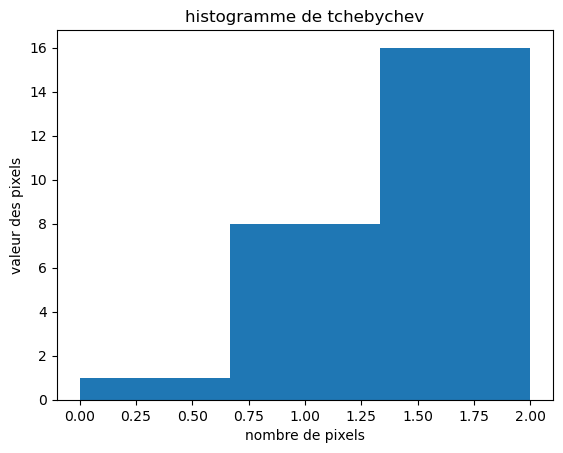

In [10]:
tchebychev_hist = tchebychev.flatten()
print(tchebychev_hist)

plt.hist(tchebychev_hist, bins=3)
plt.title("histogramme de tchebychev")
plt.xlabel("nombre de pixels")
plt.ylabel("valeur des pixels")
plt.show()

## Exercice 3
Créer un filtre linéaire 5x5 avec les distances Euclidienne à partir du centre.

<img src="distance euclidienne.PNG"
     alt="Error can't fetch img"
     style="float: left" />

[[-1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1.]]
[[2.82842712 2.23606798 2.         2.23606798 2.82842712]
 [2.23606798 1.41421356 1.         1.41421356 2.23606798]
 [2.         1.         0.         1.         2.        ]
 [2.23606798 1.41421356 1.         1.41421356 2.23606798]
 [2.82842712 2.23606798 2.         2.23606798 2.82842712]]


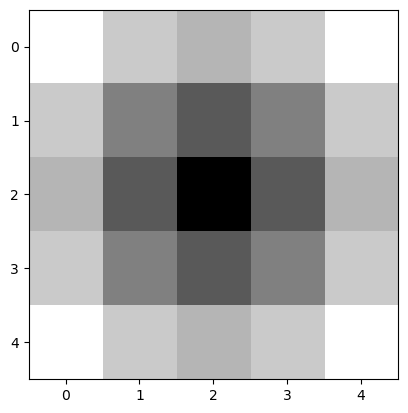

In [13]:
eucli = np.full((5,5), -1, dtype=float)
print(eucli)

x_milieu = eucli.shape[0] // 2
y_milieu = eucli.shape[1] // 2

for x2 in range(eucli.shape[0]):
    for y2 in range(eucli.shape[1]):
        eucli[x2, y2] = np.sqrt(np.square(x2 - x_milieu) + np.square(y2 - y_milieu))

print(eucli)
plt.imshow(eucli, cmap='gray')
plt.show()

## Exercice 4
Inversé l'intensité des pixels dans le filtre euclidien au numéro précédent.

> Le résultat ressemble à un filtre Gaussien

2.8284271247461903
[[0.         0.59235915 0.82842712 0.59235915 0.        ]
 [0.59235915 1.41421356 1.82842712 1.41421356 0.59235915]
 [0.82842712 1.82842712 2.82842712 1.82842712 0.82842712]
 [0.59235915 1.41421356 1.82842712 1.41421356 0.59235915]
 [0.         0.59235915 0.82842712 0.59235915 0.        ]]


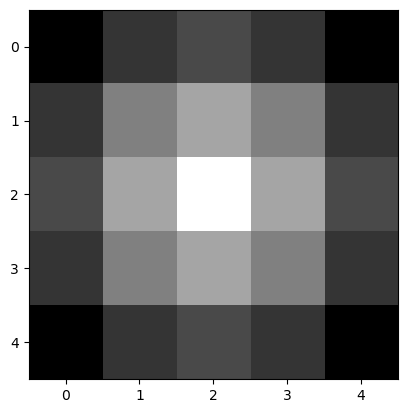

In [14]:
val_max = np.max(eucli)
print(val_max)

#Array de max pour faire l'inverse
array_max = np.full(eucli.shape, val_max)
inversed = array_max - eucli
print(inversed)

plt.imshow(inversed, cmap='gray')
plt.show()

## Exercice 5
Qu'elle est la différence entre l'application d'une convolution versus une corrélation?

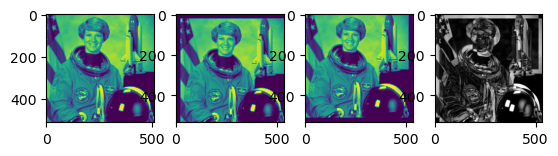

In [19]:
# Pour tester
k = np.array([
    [1,0,0],
    [0,0,0],
    [0,0,0]    
])

img = color.rgb2gray(data.astronaut())
plt.subplot(1, 4, 1)
plt.imshow(img)

correlation = signal.correlate2d(img, k)
for i in range(10):
    correlation = signal.correlate2d(correlation, k)

plt.subplot(1, 4, 2)
plt.imshow(correlation)

convolution = signal.convolve2d(img, k)
for i in range(10):
    convolution = signal.convolve2d(convolution, k)

plt.subplot(1, 4, 3)
plt.imshow(convolution)

diff = np.abs(correlation - convolution)

plt.subplot(1, 4, 4)
plt.imshow(diff,cmap='gray')
plt.show()


## Exercice 6
Implémenter et appliquer un filtre médian afin de restorer l'image dans `img`.
> Compléter les sections TODO

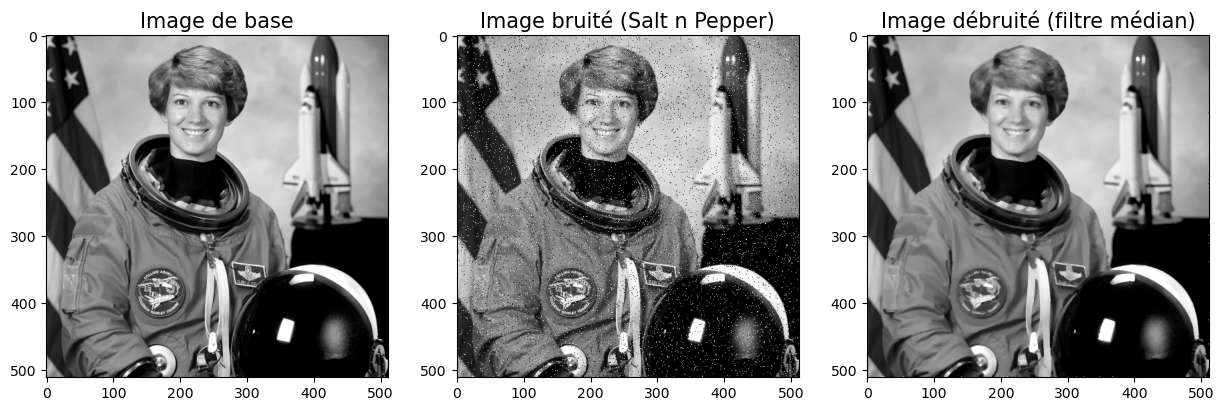

In [26]:
# Add salt and pepper noise
plt.figure(figsize=(15,15))

plt.subplot(131)
plt.title('Image de base', fontsize=15)

# Get image
img = color.rgb2gray(data.astronaut())

plt.imshow(img, cmap='gray')

plt.subplot(132)
plt.title('Image bruité (Salt n Pepper)', fontsize=15)

# Add salt n pepper noise to img
nb_pixel = img.shape[0] * img.shape[1]
noise_p = 0.025

# salt
for i in range(round(nb_pixel * noise_p)):
    x = random.randint(0, img.shape[0]-1)
    y = random.randint(0, img.shape[1]-1)
    img[x, y] = 1

# pepper
for i in range(round(nb_pixel * noise_p)):
    x = random.randint(0, img.shape[0]-1)
    y = random.randint(0, img.shape[1]-1)
    img[x, y] = 0

plt.imshow(img, cmap='gray')

plt.subplot(133)
plt.title('Image débruité (filtre médian)', fontsize=15)

# Padding
padding = np.pad(img, pad_width=2, mode='constant', constant_values=0)
# TODO

# Apply median filter on img using padding
# TODO
val_max = np.max(img)
val_min = np.min(img)
for i in range(1, img.shape[0]-1):
    for j in range(1, img.shape[1]-1):
        noyau = img[i-1:i+2, j-1:j+2]
        noyau = np.sort(noyau.flatten())
        img[i,j] = noyau[4]

plt.imshow(img, cmap='gray')

plt.show()

## Exercice 7
Quiz sur différent résultat de convolution?

In [137]:
...

Ellipsis

## Extra
Pour ceux qui on de la misère à comprendre comment et pourquoi faire de l'égalisation d'histogramme:
- [Comment: vidéo youtube](https://www.youtube.com/watch?v=PD5d7EKYLcA)
- [Exemple/Pourquoi: notebook sur Github](https://github.com/MubashirullahD/diplab06/blob/master/Histogram%20Equalization.ipynb)